# CSC 730 Assignment 5 - ADBench
### Mangesh Sakordekar

## Imports

In [1]:
from datetime import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import math
from adbench.baseline.Supervised import supervised

C:\Users\mange\anaconda3\envs\ADBench\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Reading the Data

In [29]:
X_y = np.load('../Datasets/skewed_MNIST.npy')
np.random.shuffle(X_y)
X = X_y[:,:-1]
y = X_y[:,-1]
print(X.shape,y.shape)

(12244, 784) (12244,)


Text(0, 0.5, 'frequency')

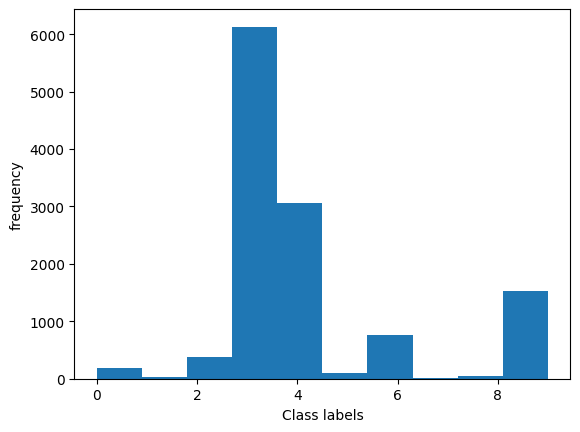

In [30]:
plt.hist(y)
plt.xlabel('Class labels')
plt.ylabel('frequency')

## Assigning Labels

In [31]:
values, counts = np.unique(y, return_counts=True)
values, counts

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([ 191,   23,  383, 6131, 3065,   95,  766,   11,   47, 1532],
       dtype=int64))

In [32]:
lbls = np.asarray([1 if i == 1 or i == 7 else 0 for i in y])

## Splitting Data into Train and Test Datasets

In [33]:
X_train = X[:9795, :]
y_train = lbls[:9795]
X_test = X[9795:, :]
y_test = lbls[9795:]

## Algorithm 1 : XG Boost

In [34]:
model = supervised(seed=42, model_name='XGB')  # initialization
model.fit(X_train, y_train)  # fit
score = model.predict_score(X_test)  # predict

In [35]:
preds_XGB = [1 if i > 0.5 else 0 for i in score]

In [36]:
cm = confusion_matrix(y_test, preds_XGB)
cm

array([[2439,    0],
       [   8,    2]], dtype=int64)

In [37]:
cm.trace() / np.sum(cm)

0.9967333605553287

## Algorithm 2: Cat Boost

In [38]:
model = supervised(seed=42, model_name='CatB')  # initialization
model.fit(X_train, y_train)  # fit
score = model.predict_score(X_test)  # predict

Learning rate set to 0.027296
0:	learn: 0.6169940	total: 58.9ms	remaining: 58.8s
1:	learn: 0.5437882	total: 111ms	remaining: 55.2s
2:	learn: 0.4798008	total: 161ms	remaining: 53.5s
3:	learn: 0.4246130	total: 213ms	remaining: 53.1s
4:	learn: 0.3732428	total: 271ms	remaining: 53.9s
5:	learn: 0.3281024	total: 322ms	remaining: 53.4s
6:	learn: 0.2932859	total: 374ms	remaining: 53.1s
7:	learn: 0.2613915	total: 427ms	remaining: 52.9s
8:	learn: 0.2305019	total: 480ms	remaining: 52.9s
9:	learn: 0.2068571	total: 533ms	remaining: 52.7s
10:	learn: 0.1853532	total: 589ms	remaining: 52.9s
11:	learn: 0.1672510	total: 647ms	remaining: 53.3s
12:	learn: 0.1496509	total: 707ms	remaining: 53.7s
13:	learn: 0.1343378	total: 765ms	remaining: 53.9s
14:	learn: 0.1220182	total: 822ms	remaining: 53.9s
15:	learn: 0.1103982	total: 879ms	remaining: 54.1s
16:	learn: 0.1003964	total: 942ms	remaining: 54.4s
17:	learn: 0.0915372	total: 1s	remaining: 54.7s
18:	learn: 0.0831861	total: 1.06s	remaining: 54.9s
19:	learn: 0.

163:	learn: 0.0043514	total: 9.95s	remaining: 50.7s
164:	learn: 0.0043392	total: 10s	remaining: 50.6s
165:	learn: 0.0043190	total: 10.1s	remaining: 50.5s
166:	learn: 0.0042981	total: 10.1s	remaining: 50.5s
167:	learn: 0.0042482	total: 10.2s	remaining: 50.4s
168:	learn: 0.0042043	total: 10.2s	remaining: 50.3s
169:	learn: 0.0041131	total: 10.3s	remaining: 50.2s
170:	learn: 0.0040463	total: 10.3s	remaining: 50.2s
171:	learn: 0.0040394	total: 10.4s	remaining: 50.1s
172:	learn: 0.0040266	total: 10.5s	remaining: 50s
173:	learn: 0.0040162	total: 10.5s	remaining: 49.9s
174:	learn: 0.0039789	total: 10.6s	remaining: 49.8s
175:	learn: 0.0039292	total: 10.6s	remaining: 49.8s
176:	learn: 0.0039144	total: 10.7s	remaining: 49.7s
177:	learn: 0.0038790	total: 10.7s	remaining: 49.6s
178:	learn: 0.0038692	total: 10.8s	remaining: 49.5s
179:	learn: 0.0038579	total: 10.9s	remaining: 49.5s
180:	learn: 0.0038524	total: 10.9s	remaining: 49.4s
181:	learn: 0.0038422	total: 11s	remaining: 49.3s
182:	learn: 0.0038

323:	learn: 0.0017224	total: 19.2s	remaining: 40.2s
324:	learn: 0.0017203	total: 19.3s	remaining: 40.1s
325:	learn: 0.0017185	total: 19.4s	remaining: 40s
326:	learn: 0.0017155	total: 19.4s	remaining: 40s
327:	learn: 0.0017101	total: 19.5s	remaining: 39.9s
328:	learn: 0.0017074	total: 19.6s	remaining: 39.9s
329:	learn: 0.0017051	total: 19.6s	remaining: 39.8s
330:	learn: 0.0017010	total: 19.7s	remaining: 39.8s
331:	learn: 0.0016968	total: 19.7s	remaining: 39.7s
332:	learn: 0.0016949	total: 19.8s	remaining: 39.7s
333:	learn: 0.0016933	total: 19.9s	remaining: 39.6s
334:	learn: 0.0016919	total: 19.9s	remaining: 39.5s
335:	learn: 0.0016904	total: 20s	remaining: 39.5s
336:	learn: 0.0016851	total: 20.1s	remaining: 39.5s
337:	learn: 0.0016712	total: 20.1s	remaining: 39.5s
338:	learn: 0.0016688	total: 20.2s	remaining: 39.4s
339:	learn: 0.0016645	total: 20.3s	remaining: 39.4s
340:	learn: 0.0016416	total: 20.3s	remaining: 39.3s
341:	learn: 0.0016395	total: 20.4s	remaining: 39.3s
342:	learn: 0.0016

485:	learn: 0.0011157	total: 29s	remaining: 30.6s
486:	learn: 0.0011146	total: 29s	remaining: 30.6s
487:	learn: 0.0011141	total: 29.1s	remaining: 30.5s
488:	learn: 0.0011009	total: 29.1s	remaining: 30.4s
489:	learn: 0.0011000	total: 29.2s	remaining: 30.4s
490:	learn: 0.0010997	total: 29.2s	remaining: 30.3s
491:	learn: 0.0010989	total: 29.3s	remaining: 30.3s
492:	learn: 0.0010851	total: 29.4s	remaining: 30.2s
493:	learn: 0.0010843	total: 29.4s	remaining: 30.1s
494:	learn: 0.0010840	total: 29.5s	remaining: 30.1s
495:	learn: 0.0010833	total: 29.5s	remaining: 30s
496:	learn: 0.0010730	total: 29.6s	remaining: 29.9s
497:	learn: 0.0010722	total: 29.7s	remaining: 29.9s
498:	learn: 0.0010718	total: 29.7s	remaining: 29.8s
499:	learn: 0.0010708	total: 29.8s	remaining: 29.8s
500:	learn: 0.0010703	total: 29.8s	remaining: 29.7s
501:	learn: 0.0010699	total: 29.9s	remaining: 29.7s
502:	learn: 0.0010693	total: 30s	remaining: 29.6s
503:	learn: 0.0010662	total: 30s	remaining: 29.5s
504:	learn: 0.0010660	

647:	learn: 0.0007843	total: 38.8s	remaining: 21.1s
648:	learn: 0.0007837	total: 38.8s	remaining: 21s
649:	learn: 0.0007771	total: 38.9s	remaining: 20.9s
650:	learn: 0.0007767	total: 38.9s	remaining: 20.9s
651:	learn: 0.0007762	total: 39s	remaining: 20.8s
652:	learn: 0.0007759	total: 39.1s	remaining: 20.8s
653:	learn: 0.0007755	total: 39.1s	remaining: 20.7s
654:	learn: 0.0007753	total: 39.2s	remaining: 20.6s
655:	learn: 0.0007686	total: 39.2s	remaining: 20.6s
656:	learn: 0.0007679	total: 39.3s	remaining: 20.5s
657:	learn: 0.0007675	total: 39.4s	remaining: 20.5s
658:	learn: 0.0007623	total: 39.4s	remaining: 20.4s
659:	learn: 0.0007620	total: 39.5s	remaining: 20.3s
660:	learn: 0.0007615	total: 39.5s	remaining: 20.3s
661:	learn: 0.0007610	total: 39.6s	remaining: 20.2s
662:	learn: 0.0007609	total: 39.6s	remaining: 20.1s
663:	learn: 0.0007608	total: 39.7s	remaining: 20.1s
664:	learn: 0.0007604	total: 39.8s	remaining: 20s
665:	learn: 0.0007600	total: 39.8s	remaining: 20s
666:	learn: 0.000753

807:	learn: 0.0006088	total: 47.9s	remaining: 11.4s
808:	learn: 0.0006084	total: 48s	remaining: 11.3s
809:	learn: 0.0006081	total: 48.1s	remaining: 11.3s
810:	learn: 0.0006080	total: 48.1s	remaining: 11.2s
811:	learn: 0.0006079	total: 48.2s	remaining: 11.2s
812:	learn: 0.0006076	total: 48.2s	remaining: 11.1s
813:	learn: 0.0006011	total: 48.3s	remaining: 11s
814:	learn: 0.0006009	total: 48.4s	remaining: 11s
815:	learn: 0.0006006	total: 48.4s	remaining: 10.9s
816:	learn: 0.0006005	total: 48.5s	remaining: 10.9s
817:	learn: 0.0006002	total: 48.5s	remaining: 10.8s
818:	learn: 0.0005976	total: 48.6s	remaining: 10.7s
819:	learn: 0.0005973	total: 48.6s	remaining: 10.7s
820:	learn: 0.0005972	total: 48.7s	remaining: 10.6s
821:	learn: 0.0005971	total: 48.7s	remaining: 10.6s
822:	learn: 0.0005970	total: 48.8s	remaining: 10.5s
823:	learn: 0.0005969	total: 48.9s	remaining: 10.4s
824:	learn: 0.0005966	total: 48.9s	remaining: 10.4s
825:	learn: 0.0005966	total: 49s	remaining: 10.3s
826:	learn: 0.000596

968:	learn: 0.0004704	total: 57.7s	remaining: 1.84s
969:	learn: 0.0004704	total: 57.7s	remaining: 1.78s
970:	learn: 0.0004698	total: 57.8s	remaining: 1.73s
971:	learn: 0.0004696	total: 57.8s	remaining: 1.67s
972:	learn: 0.0004694	total: 57.9s	remaining: 1.61s
973:	learn: 0.0004693	total: 57.9s	remaining: 1.55s
974:	learn: 0.0004691	total: 58s	remaining: 1.49s
975:	learn: 0.0004629	total: 58.1s	remaining: 1.43s
976:	learn: 0.0004629	total: 58.1s	remaining: 1.37s
977:	learn: 0.0004617	total: 58.2s	remaining: 1.31s
978:	learn: 0.0004615	total: 58.2s	remaining: 1.25s
979:	learn: 0.0004615	total: 58.3s	remaining: 1.19s
980:	learn: 0.0004609	total: 58.3s	remaining: 1.13s
981:	learn: 0.0004608	total: 58.4s	remaining: 1.07s
982:	learn: 0.0004596	total: 58.5s	remaining: 1.01s
983:	learn: 0.0004595	total: 58.5s	remaining: 952ms
984:	learn: 0.0004593	total: 58.6s	remaining: 892ms
985:	learn: 0.0004576	total: 58.6s	remaining: 833ms
986:	learn: 0.0004576	total: 58.7s	remaining: 773ms
987:	learn: 0.

In [39]:
preds_CatB = [1 if i > 0.5 else 0 for i in score]

In [40]:
cm = confusion_matrix(y_test, preds_CatB)
cm

array([[2439,    0],
       [   8,    2]], dtype=int64)

In [41]:
cm.trace() / np.sum(cm)

0.9967333605553287